In [44]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud
from pandas import DataFrame
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from pathlib import Path
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning) 
warnings.filterwarnings('ignore', category=FutureWarning) 
warnings.filterwarnings('ignore', category=UserWarning) 

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Activation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

In [20]:
!pip install tensorflow keras 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
df_reviews = pd.read_csv('/content/sample_data/filtered_nike_adidas_reviews_data.csv', error_bad_lines=False)
nike_reviews  = df_reviews[df_reviews['Brand'] == 'nike']
none_nike_reviews = df_reviews[df_reviews['Brand'] != 'nike']

In [8]:
nike_train_reviews, nike_test_reviews, nike_train_sentiments, nike_test_sentiments = train_test_split(nike_reviews['Review'].values,nike_reviews['Sentiment'].values,
                                                                                                      test_size=0.25, random_state=42)
adidas_train_reviews, adidas_test_reviews, adidas_train_sentiments, adidas_test_sentiments = train_test_split(none_nike_reviews['Review'].values,none_nike_reviews['Sentiment'].values,
                                                                                                      test_size=0.25, random_state=42)

In [61]:
print(nike_train_reviews)

['fast shipping shoes right size package came shoes place big box shoe boxes packed smaller box put paper something shoes didnt come shoe boxed tossed around ups gifts kinds embarrassing open shoe box brand new pair af see shoe box paper looking fresh neat hence star review extremely fast shipping i m happy font order hibbetts take ever still don t package ordered days nike'
 'spent thousands dollars nike i m repaid telling file police report items failed deliver said delivered garage don t garage used picture proof guys terribly inept scammy company won t using'
 'tried order nike offering everything days order kept failing go told customer service nike website issue fixed promo finished told could order items full price discount apology offer match original discount impressed due nike issue could order items valid discount instead told pay higher price taking business elsewhere'
 'read bad reviews nike don t mean handle situations responsibly ordered trainers said delayed days ordere

In [62]:
print(nike_test_reviews)

['soles shoes rot away look shoe still perfect condition rubber used soles crumbling like dry cookie company involved childlabour low wage exploitation expect enough spare good sole overpriced products sell west'
 'absolutely terrible service even worse sales service ordered shoes birthday present found order cancelled day delivery expected reason cancellation offered promo code couldn t applied item purchasing absolute joke'
 'another person wished read reviews purchasing evri courier need say apparently couldn t deliver parcel bad weather despite sunshine i ve waiting since tuesday hope ever receiving trying get refund also minefield shall see ever goes back bank account awful service disappointed never purchase nike online'
 'ridiculous customer service customer service team can t issue refund i ve called x times dec rd dec th jan keep escalating nobody ever called back higher management order still arrived totally missed christmas son it s weeks ridiculous i m telling everyone neve

In [9]:
# CountVectorizer
cv = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{4,}\b')

MyDTM_nike = cv.fit_transform(nike_train_reviews)  # create a sparse matrix
ColumnNames_nike=cv.get_feature_names_out() ## This is the vocab
cv_nike_df=pd.DataFrame(MyDTM_nike.toarray(),columns=ColumnNames_nike)
## Convert the labels from list to df
Labels_nike_DF = pd.DataFrame(nike_train_sentiments,columns=['LABEL'])

MyDTM_adidas = cv.fit_transform(none_nike_reviews['Review'])  # create a sparse matrix
ColumnNames_adidas=cv.get_feature_names_out() ## This is the vocab
cv_adidas_df=pd.DataFrame(MyDTM_adidas.toarray(),columns=ColumnNames_adidas)
## Convert the labels from list to df
Labels_adidas_DF = pd.DataFrame(adidas_train_sentiments,columns=['LABEL'])

In [10]:
nike_dfs = [Labels_nike_DF, cv_nike_df]
Final_nike_Labeled = pd.concat(nike_dfs,axis=1, join='inner')


adidas_dfs = [Labels_adidas_DF, cv_adidas_df]
Final_adidas_Labeled = pd.concat(adidas_dfs,axis=1, join='inner')

In [13]:
NumCols=Final_nike_Labeled.shape[1]
top_words=list(Final_nike_Labeled.columns[1:NumCols+1])
print(top_words[0])
print(top_words[-1])

ability
zero


In [14]:
## Encoding the data
def Encode(review):
    words = review.split()
    if len(words) > 500:
        words = words[:500]
    encoding = []
    for word in words:
        try:
            index = top_words.index(word)
        except:
            index = (NumCols - 1)
        encoding.append(index)
    while len(encoding) < 500:
        encoding.append(NumCols)
    return encoding

NN for Nike Reviews

In [48]:
############### Final Training and Testing data and labels-----------------
training_data = np.array([Encode(review) for review in nike_train_reviews])
#print(training_data[20])
#print(training_data.shape)
testing_data = np.array([Encode(review) for review in nike_test_reviews])
#print(testing_data[20])
print (training_data.shape, testing_data.shape)
## Prepare the labels if they are not already 0 and 1. In our case they are
## so these lines are commented out and just FYI
train_labels = [1 if sentiment=='positive' else 0 for sentiment in nike_train_sentiments]
test_labels = [1 if sentiment=='positive' else 0 for sentiment in nike_test_sentiments]
train_labels = np.array([train_labels])
train_labels=train_labels.T

test_labels = np.array([test_labels])
test_labels=test_labels.T


(234, 500) (78, 500)


Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 500)]             0         
                                                                 
 embedding_17 (Embedding)    (None, 500, 32)           64608     
                                                                 
 bidirectional_7 (Bidirectio  (None, 100)              8300      
 nal)                                                            
                                                                 
 dense_43 (Dense)            (None, 1)                 101       
                                                                 
 activation_41 (Activation)  (None, 1)                 0         
                                                                 
Total params: 73,009
Trainable params: 73,009
Non-trainable params: 0
______________________________________________________

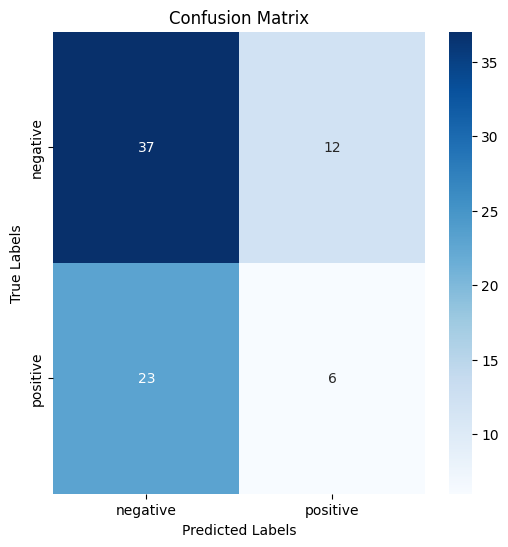

In [49]:
###################################
## RNN
###############################################

input_data = tensorflow.keras.layers.Input(shape=(500))
 
data = tensorflow.keras.layers.Embedding(input_dim=input_dim, output_dim=32, input_length=500)(input_data)
 #https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional
data = tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.SimpleRNN(50))(data)
data = tensorflow.keras.layers.Dense(1)(data)

output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()
model.fit(training_data, train_labels, epochs=10, batch_size=256, validation_data=(testing_data, test_labels))

print("Evaluate model on test data")
results = model.evaluate(testing_data, test_labels, batch_size=256)
print("test loss, test acc:", results)

# Generate a prediction using model.predict() 
# and calculate it's shape:
print("Generate a prediction")
prediction = model.predict(testing_data)
print(prediction[:10])
print("prediction shape:", prediction.shape)
#print(type(prediction))
prediction[prediction > .5] = 1
prediction[prediction <= .5] = 0
print(prediction[:10])

prediction = ['positive' if item == 1 else 'negative' for item in prediction]
print(prediction[:10])

test_labels_str = ['positive' if item == 1 else 'negative' for item in test_labels]
labels = ['negative', 'positive']
print(classification_report(test_labels_str, prediction))
cm = confusion_matrix(test_labels_str, prediction)
pd.DataFrame(cm, index=labels, columns=labels)

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=list(labels), 
                    yticklabels=list(labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 500)]             0         
                                                                 
 embedding_18 (Embedding)    (None, 500, 32)           64608     
                                                                 
 bidirectional_8 (Bidirectio  (None, 100)              33200     
 nal)                                                            
                                                                 
 dense_44 (Dense)            (None, 1)                 101       
                                                                 
 activation_42 (Activation)  (None, 1)                 0         
                                                                 
Total params: 97,909
Trainable params: 97,909
Non-trainable params: 0
______________________________________________________

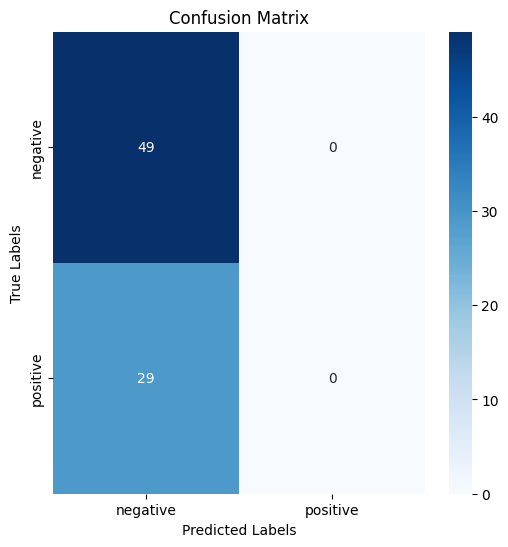

In [50]:
############################################
## LSTM
############################################# 
input_data = tensorflow.keras.layers.Input(shape=(500))
 
data = tensorflow.keras.layers.Embedding(input_dim=input_dim, output_dim=32, input_length=500)(input_data)
data = tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(50))(data)
data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
 
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()
model.fit(training_data, train_labels, epochs=10, batch_size=128, validation_data=(testing_data, test_labels))

print("Evaluate model on test data")
results = model.evaluate(testing_data, test_labels, batch_size=256)
print("test loss, test acc:", results)

# Generate a prediction using model.predict() 
# and calculate it's shape:
print("Generate a prediction")
prediction = model.predict(testing_data)
print(prediction[:10])
print("prediction shape:", prediction.shape)
#print(type(prediction))
prediction[prediction > .5] = 1
prediction[prediction <= .5] = 0
print(prediction[:10])

prediction = ['positive' if item == 1 else 'negative' for item in prediction]
print(prediction[:10])

test_labels_str = ['positive' if item == 1 else 'negative' for item in test_labels]
labels = ['negative', 'positive']
print(classification_report(test_labels_str, prediction))
cm = confusion_matrix(test_labels_str, prediction)
pd.DataFrame(cm, index=labels, columns=labels)

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=list(labels), 
                    yticklabels=list(labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 500)]             0         
                                                                 
 embedding_19 (Embedding)    (None, 500, 32)           64608     
                                                                 
 conv1d_8 (Conv1D)           (None, 498, 50)           4850      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 249, 50)          0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 247, 40)           6040      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 123, 40)          0         
 1D)                                                      

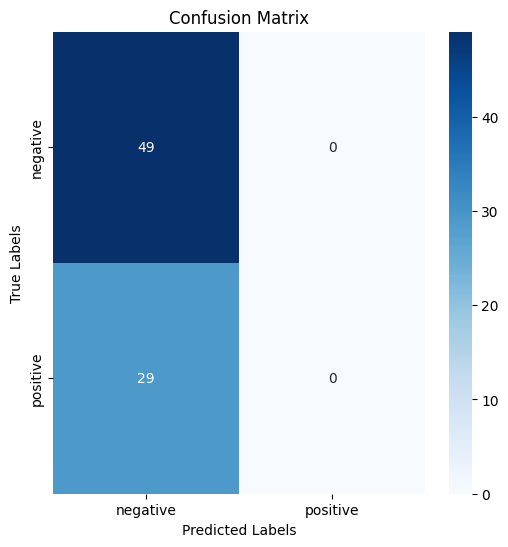

In [51]:
######################################
## CNN
######################################## 
input_data = tensorflow.keras.layers.Input(shape=(500))
 
data = tensorflow.keras.layers.Embedding(input_dim=input_dim, output_dim=32, input_length=500)(input_data)
data = tensorflow.keras.layers.Conv1D(50, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
data = tensorflow.keras.layers.Conv1D(40, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
data = tensorflow.keras.layers.Conv1D(30, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
data = tensorflow.keras.layers.Conv1D(30, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
data = tensorflow.keras.layers.Flatten()(data)
data = tensorflow.keras.layers.Dense(20)(data)
data = tensorflow.keras.layers.Dropout(0.5)(data)
data = tensorflow.keras.layers.Dense(1)(data)

output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()
model.fit(training_data, train_labels, epochs=10, batch_size=256, validation_data=(testing_data, test_labels))


print("Evaluate model on test data")
results = model.evaluate(testing_data, test_labels, batch_size=256)
print("test loss, test acc:", results)

# Generate a prediction using model.predict() 
# Generate a prediction using model.predict() 
# and calculate it's shape:
print("Generate a prediction")
prediction = model.predict(testing_data)
print(prediction[:10])
print("prediction shape:", prediction.shape)
#print(type(prediction))
prediction[prediction > .5] = 1
prediction[prediction <= .5] = 0
print(prediction[:10])

prediction = ['positive' if item == 1 else 'negative' for item in prediction]
print(prediction[:10])

test_labels_str = ['positive' if item == 1 else 'negative' for item in test_labels]
labels = ['negative', 'positive']
print(classification_report(test_labels_str, prediction))
cm = confusion_matrix(test_labels_str, prediction)
pd.DataFrame(cm, index=labels, columns=labels)

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=list(labels), 
                    yticklabels=list(labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [53]:
###############################
## ANN
#################################
## Simple Dense NN for sentiment analysis (classification 0 neg, 1 pos)
# First layer: Embedding Layer (Keras Embedding Layer) that will learn embeddings 
# for different words .
## RE: ## https://keras.io/api/layers/core_layers/embedding/
## input_dim: Integer. Size of the vocabulary
## input_length: Length of input sequences, when it is constant.
print(NumCols)   
input_dim = NumCols + 1 

 #https://www.tensorflow.org/api_docs/python/tf/keras/Input
input_data = tf.keras.layers.Input(shape=(500))
 #https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

data = tf.keras.layers.Embedding(input_dim=input_dim, output_dim=64, input_length=500)(input_data)
##input_dim: Integer. Size of the vocabulary, i.e. maximum integer index + 1

 #output_dim: Integer. Dimension of the dense embedding.
 # output_dim: This is the size of the vector space in which words will be embedded. 
 #It defines the size of the output vectors from this layer for each word. 
 # For example, it could be 32 or 100 or even larger.
 #https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
#  In an embedding, words are represented by dense vectors where a vector represents 
#  the projection of the word into a continuous vector space.
# The position of a word within the vector space is learned 
# from text and is based on the words that surround the word when it is used.
# The position of a word in the learned vector space is referred to as its embedding.
# data = tensorflow.keras.layers.Flatten()(data)
 #Dense layers require inputs as (batch_size, input_size) 
data = tf.keras.layers.Dense(16)(data)
data = tf.keras.layers.Activation('relu')(data)
data = tf.keras.layers.Dense(8)(data)
data = tf.keras.layers.Activation('relu')(data) 
data = tf.keras.layers.Dense(4)(data)
data = tf.keras.layers.Activation('sigmoid')(data) 
data = tf.keras.layers.Dense(1)(data)

output_data = tf.keras.layers.Activation('sigmoid')(data)
model = tf.keras.models.Model(inputs=input_data, outputs=output_data)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

print(training_data[0:3, 0:3])
print(training_data.shape)
model.fit(training_data, train_labels, epochs=10, batch_size=256, validation_data=(testing_data, test_labels))

print("Evaluate model on test data")
results = model.evaluate(testing_data, test_labels, batch_size=256)
print("test loss, test acc:", results)

# Generate a prediction using model.predict() 
# and calculate it's shape:
print("Generate a prediction")
prediction = model.predict(testing_data)
print(prediction[:10])
print("prediction shape:", prediction.shape)
#print(type(prediction))
prediction[prediction > .5] = 1
prediction[prediction <= .5] = 0
print(prediction[:10])



2018
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 500)]             0         
                                                                 
 embedding_21 (Embedding)    (None, 500, 64)           129216    
                                                                 
 dense_51 (Dense)            (None, 500, 16)           1040      
                                                                 
 activation_48 (Activation)  (None, 500, 16)           0         
                                                                 
 dense_52 (Dense)            (None, 500, 8)            136       
                                                                 
 activation_49 (Activation)  (None, 500, 8)            0         
                                                                 
 dense_53 (Dense)            (None, 500, 4)          

NN for Non-Nike Reviews

In [54]:
############### Final Training and Testing data and labels-----------------
training_data = np.array([Encode(review) for review in adidas_train_reviews])
#print(training_data[20])
#print(training_data.shape)
testing_data = np.array([Encode(review) for review in adidas_test_reviews])
#print(testing_data[20])
print (training_data.shape, testing_data.shape)
## Prepare the labels if they are not already 0 and 1. In our case they are
## so these lines are commented out and just FYI
train_labels = [1 if sentiment=='positive' else 0 for sentiment in adidas_train_sentiments]
test_labels = [1 if sentiment=='positive' else 0 for sentiment in adidas_test_sentiments]
train_labels = np.array([train_labels])
train_labels=train_labels.T

test_labels = np.array([test_labels])
test_labels=test_labels.T

(233, 500) (78, 500)


Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 500)]             0         
                                                                 
 embedding_22 (Embedding)    (None, 500, 32)           64608     
                                                                 
 bidirectional_9 (Bidirectio  (None, 100)              8300      
 nal)                                                            
                                                                 
 dense_55 (Dense)            (None, 1)                 101       
                                                                 
 activation_52 (Activation)  (None, 1)                 0         
                                                                 
Total params: 73,009
Trainable params: 73,009
Non-trainable params: 0
______________________________________________________

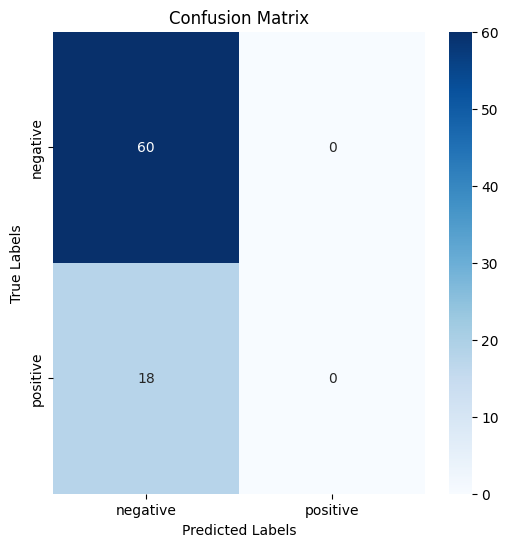

In [55]:
###################################
## RNN
###############################################

input_data = tensorflow.keras.layers.Input(shape=(500))
 
data = tensorflow.keras.layers.Embedding(input_dim=input_dim, output_dim=32, input_length=500)(input_data)
 #https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional
data = tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.SimpleRNN(50))(data)
data = tensorflow.keras.layers.Dense(1)(data)

output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()
model.fit(training_data, train_labels, epochs=10, batch_size=256, validation_data=(testing_data, test_labels))

print("Evaluate model on test data")
results = model.evaluate(testing_data, test_labels, batch_size=256)
print("test loss, test acc:", results)

# Generate a prediction using model.predict() 
# and calculate it's shape:
print("Generate a prediction")
prediction = model.predict(testing_data)
print(prediction[:10])
print("prediction shape:", prediction.shape)
#print(type(prediction))
prediction[prediction > .5] = 1
prediction[prediction <= .5] = 0
print(prediction[:10])

prediction = ['positive' if item == 1 else 'negative' for item in prediction]
print(prediction[:10])

test_labels_str = ['positive' if item == 1 else 'negative' for item in test_labels]
labels = ['negative', 'positive']
print(classification_report(test_labels_str, prediction))
cm = confusion_matrix(test_labels_str, prediction)
pd.DataFrame(cm, index=labels, columns=labels)

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=list(labels), 
                    yticklabels=list(labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 500)]             0         
                                                                 
 embedding_23 (Embedding)    (None, 500, 32)           64608     
                                                                 
 bidirectional_10 (Bidirecti  (None, 100)              33200     
 onal)                                                           
                                                                 
 dense_56 (Dense)            (None, 1)                 101       
                                                                 
 activation_53 (Activation)  (None, 1)                 0         
                                                                 
Total params: 97,909
Trainable params: 97,909
Non-trainable params: 0
______________________________________________________

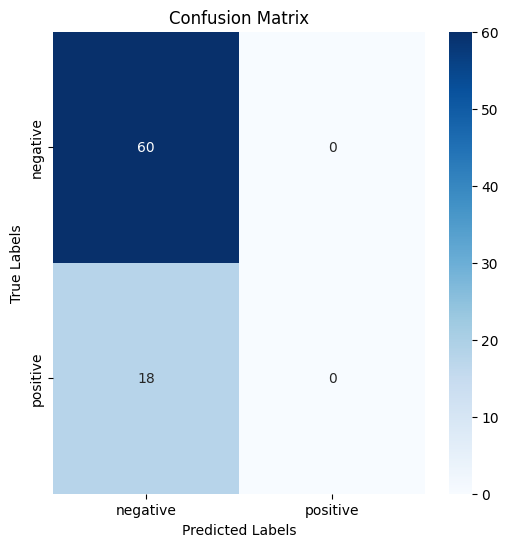

In [56]:
############################################
## LSTM
############################################# 
input_data = tensorflow.keras.layers.Input(shape=(500))
 
data = tensorflow.keras.layers.Embedding(input_dim=input_dim, output_dim=32, input_length=500)(input_data)
data = tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(50))(data)
data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
 
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()
model.fit(training_data, train_labels, epochs=10, batch_size=128, validation_data=(testing_data, test_labels))

print("Evaluate model on test data")
results = model.evaluate(testing_data, test_labels, batch_size=256)
print("test loss, test acc:", results)

# Generate a prediction using model.predict() 
# and calculate it's shape:
print("Generate a prediction")
prediction = model.predict(testing_data)
print(prediction[:10])
print("prediction shape:", prediction.shape)
#print(type(prediction))
prediction[prediction > .5] = 1
prediction[prediction <= .5] = 0
print(prediction[:10])

prediction = ['positive' if item == 1 else 'negative' for item in prediction]
print(prediction[:10])

test_labels_str = ['positive' if item == 1 else 'negative' for item in test_labels]
labels = ['negative', 'positive']
print(classification_report(test_labels_str, prediction))
cm = confusion_matrix(test_labels_str, prediction)
pd.DataFrame(cm, index=labels, columns=labels)

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=list(labels), 
                    yticklabels=list(labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 500)]             0         
                                                                 
 embedding_24 (Embedding)    (None, 500, 32)           64608     
                                                                 
 bidirectional_11 (Bidirecti  (None, 100)              33200     
 onal)                                                           
                                                                 
 dense_57 (Dense)            (None, 1)                 101       
                                                                 
 activation_54 (Activation)  (None, 1)                 0         
                                                                 
Total params: 97,909
Trainable params: 97,909
Non-trainable params: 0
______________________________________________________

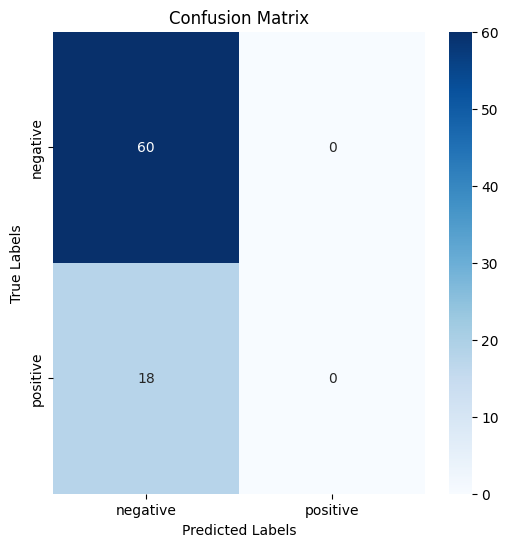

In [57]:
############################################
## LSTM
############################################# 
input_data = tensorflow.keras.layers.Input(shape=(500))
 
data = tensorflow.keras.layers.Embedding(input_dim=input_dim, output_dim=32, input_length=500)(input_data)
data = tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(50))(data)
data = tensorflow.keras.layers.Dense(1)(data)
output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
 
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()
model.fit(training_data, train_labels, epochs=10, batch_size=128, validation_data=(testing_data, test_labels))

print("Evaluate model on test data")
results = model.evaluate(testing_data, test_labels, batch_size=256)
print("test loss, test acc:", results)

# Generate a prediction using model.predict() 
# and calculate it's shape:
print("Generate a prediction")
prediction = model.predict(testing_data)
print(prediction[:10])
print("prediction shape:", prediction.shape)
#print(type(prediction))
prediction[prediction > .5] = 1
prediction[prediction <= .5] = 0
print(prediction[:10])

prediction = ['positive' if item == 1 else 'negative' for item in prediction]
print(prediction[:10])

test_labels_str = ['positive' if item == 1 else 'negative' for item in test_labels]
labels = ['negative', 'positive']
print(classification_report(test_labels_str, prediction))
cm = confusion_matrix(test_labels_str, prediction)
pd.DataFrame(cm, index=labels, columns=labels)

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=list(labels), 
                    yticklabels=list(labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 500)]             0         
                                                                 
 embedding_25 (Embedding)    (None, 500, 32)           64608     
                                                                 
 conv1d_12 (Conv1D)          (None, 498, 50)           4850      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 249, 50)          0         
 g1D)                                                            
                                                                 
 conv1d_13 (Conv1D)          (None, 247, 40)           6040      
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 123, 40)          0         
 g1D)                                                     

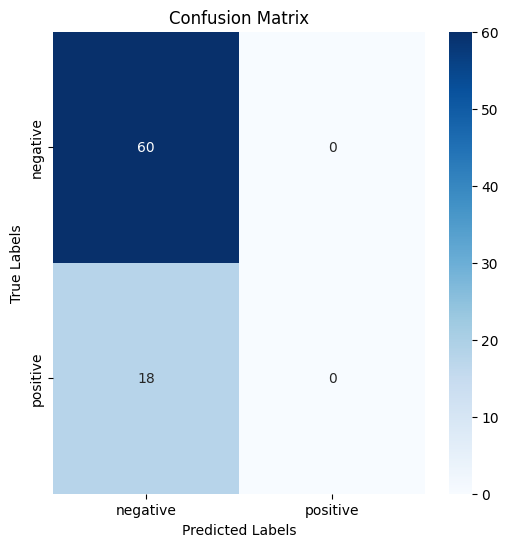

In [58]:
######################################
## CNN
######################################## 
input_data = tensorflow.keras.layers.Input(shape=(500))
 
data = tensorflow.keras.layers.Embedding(input_dim=input_dim, output_dim=32, input_length=500)(input_data)
data = tensorflow.keras.layers.Conv1D(50, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
data = tensorflow.keras.layers.Conv1D(40, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
data = tensorflow.keras.layers.Conv1D(30, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
data = tensorflow.keras.layers.Conv1D(30, kernel_size=3, activation='relu')(data)
data = tensorflow.keras.layers.MaxPool1D(pool_size=2)(data)
data = tensorflow.keras.layers.Flatten()(data)
data = tensorflow.keras.layers.Dense(20)(data)
data = tensorflow.keras.layers.Dropout(0.5)(data)
data = tensorflow.keras.layers.Dense(1)(data)

output_data = tensorflow.keras.layers.Activation('sigmoid')(data)
model = tensorflow.keras.models.Model(inputs=input_data, outputs=output_data)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()
model.fit(training_data, train_labels, epochs=10, batch_size=256, validation_data=(testing_data, test_labels))


print("Evaluate model on test data")
results = model.evaluate(testing_data, test_labels, batch_size=256)
print("test loss, test acc:", results)

# Generate a prediction using model.predict() 
# Generate a prediction using model.predict() 
# and calculate it's shape:
print("Generate a prediction")
prediction = model.predict(testing_data)
print(prediction[:10])
print("prediction shape:", prediction.shape)
#print(type(prediction))
prediction[prediction > .5] = 1
prediction[prediction <= .5] = 0
print(prediction[:10])

prediction = ['positive' if item == 1 else 'negative' for item in prediction]
print(prediction[:10])

test_labels_str = ['positive' if item == 1 else 'negative' for item in test_labels]
labels = ['negative', 'positive']
print(classification_report(test_labels_str, prediction))
cm = confusion_matrix(test_labels_str, prediction)
pd.DataFrame(cm, index=labels, columns=labels)

# Visualize confusion matrix with heatmap
plt.figure(figsize=(6,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=list(labels), 
                    yticklabels=list(labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [59]:
###############################
## ANN
#################################
## Simple Dense NN for sentiment analysis (classification 0 neg, 1 pos)
# First layer: Embedding Layer (Keras Embedding Layer) that will learn embeddings 
# for different words .
## RE: ## https://keras.io/api/layers/core_layers/embedding/
## input_dim: Integer. Size of the vocabulary
## input_length: Length of input sequences, when it is constant.
print(NumCols)   
input_dim = NumCols + 1 

 #https://www.tensorflow.org/api_docs/python/tf/keras/Input
input_data = tf.keras.layers.Input(shape=(500))
 #https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

data = tf.keras.layers.Embedding(input_dim=input_dim, output_dim=64, input_length=500)(input_data)
##input_dim: Integer. Size of the vocabulary, i.e. maximum integer index + 1

 #output_dim: Integer. Dimension of the dense embedding.
 # output_dim: This is the size of the vector space in which words will be embedded. 
 #It defines the size of the output vectors from this layer for each word. 
 # For example, it could be 32 or 100 or even larger.
 #https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
#  In an embedding, words are represented by dense vectors where a vector represents 
#  the projection of the word into a continuous vector space.
# The position of a word within the vector space is learned 
# from text and is based on the words that surround the word when it is used.
# The position of a word in the learned vector space is referred to as its embedding.
# data = tensorflow.keras.layers.Flatten()(data)
 #Dense layers require inputs as (batch_size, input_size) 
data = tf.keras.layers.Dense(16)(data)
data = tf.keras.layers.Activation('relu')(data)
data = tf.keras.layers.Dense(8)(data)
data = tf.keras.layers.Activation('relu')(data) 
data = tf.keras.layers.Dense(4)(data)
data = tf.keras.layers.Activation('sigmoid')(data) 
data = tf.keras.layers.Dense(1)(data)

output_data = tf.keras.layers.Activation('sigmoid')(data)
model = tf.keras.models.Model(inputs=input_data, outputs=output_data)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

print(training_data[0:3, 0:3])
print(training_data.shape)
model.fit(training_data, train_labels, epochs=10, batch_size=256, validation_data=(testing_data, test_labels))

print("Evaluate model on test data")
results = model.evaluate(testing_data, test_labels, batch_size=256)
print("test loss, test acc:", results)

# Generate a prediction using model.predict() 
# and calculate it's shape:
print("Generate a prediction")
prediction = model.predict(testing_data)
print(prediction[:10])
print("prediction shape:", prediction.shape)
#print(type(prediction))
prediction[prediction > .5] = 1
prediction[prediction <= .5] = 0
print(prediction[:10])



2018
Model: "model_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 500)]             0         
                                                                 
 embedding_26 (Embedding)    (None, 500, 64)           129216    
                                                                 
 dense_60 (Dense)            (None, 500, 16)           1040      
                                                                 
 activation_56 (Activation)  (None, 500, 16)           0         
                                                                 
 dense_61 (Dense)            (None, 500, 8)            136       
                                                                 
 activation_57 (Activation)  (None, 500, 8)            0         
                                                                 
 dense_62 (Dense)            (None, 500, 4)          